# 자연어 처리(Natural Language Processing)

* 자연어는 일상 생활에서 사용하는 언어
* 자연어 처리는 자연어의 의미를 분석 처리하는 일
* 텍스트 분류, 감성 분석, 문서 요약, 번역, 질의 응답, 음성 인식, 챗봇과 같은 응용

<br>

<br>

## 자연어 처리 단계

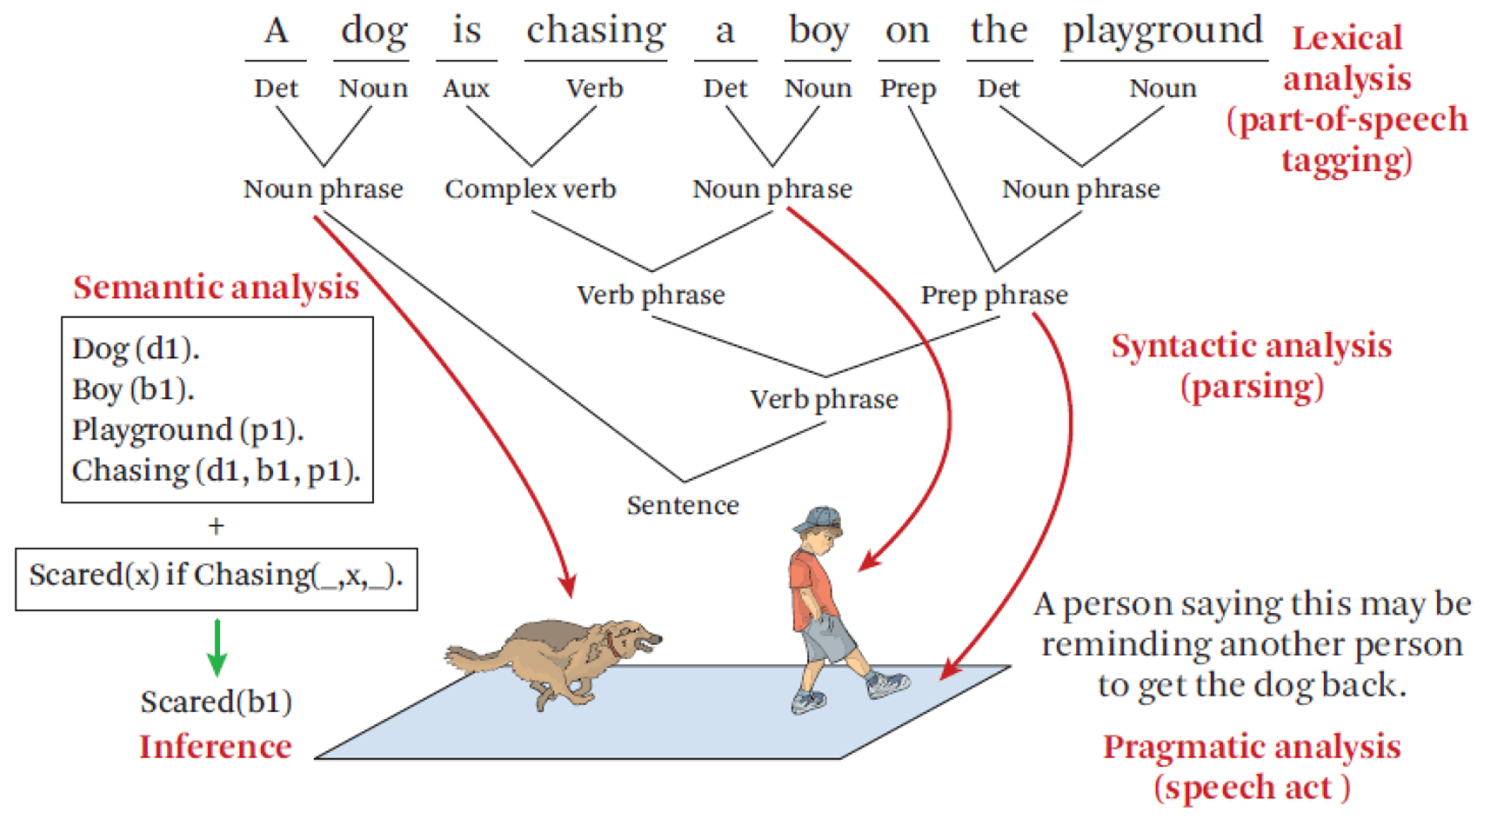

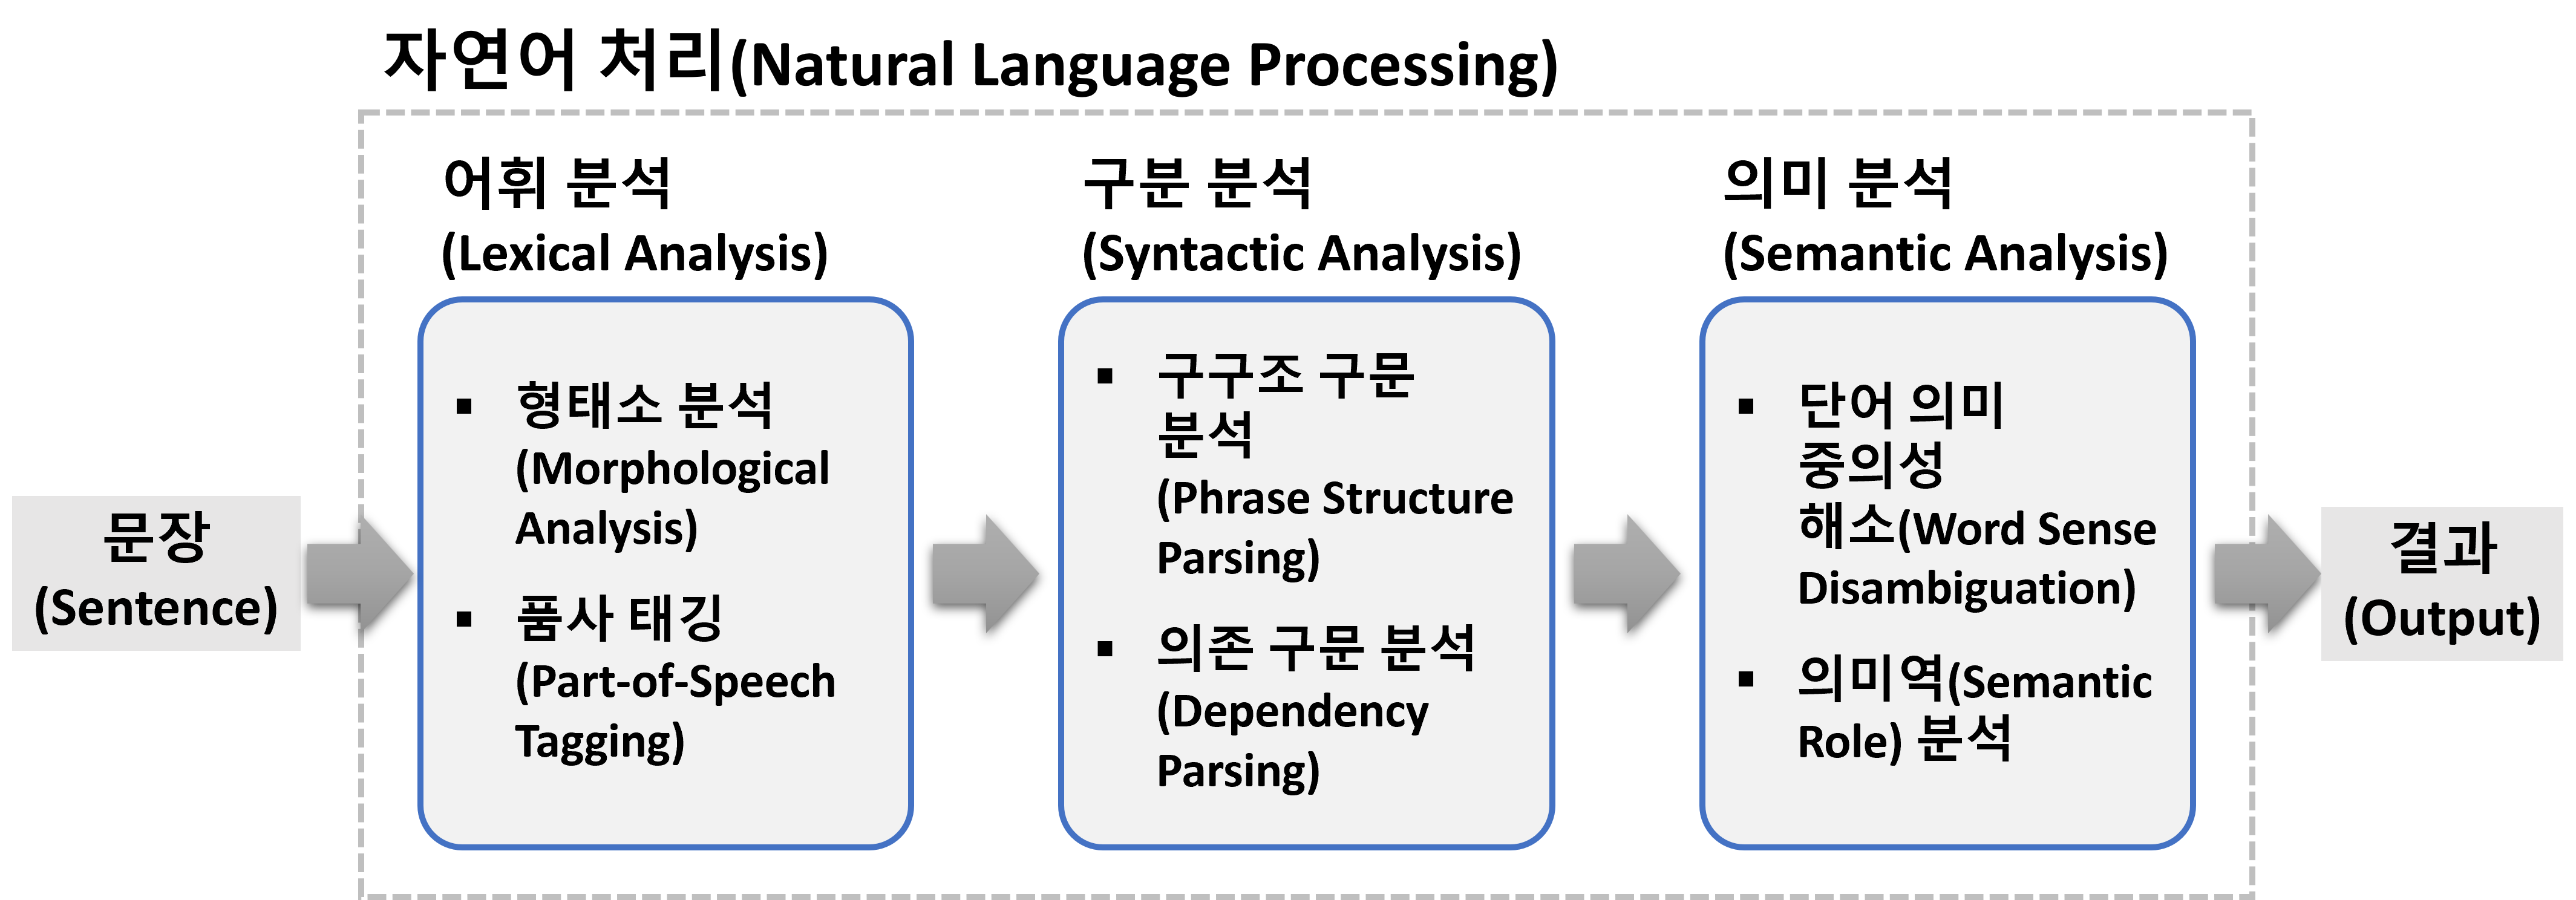

* 어휘 분석(Lexical Analysis): 단어의 구조를 식별하고 분석하여 어휘의 의미와 품사에 대한 단어 수준의 연구
  - 형태소 분석(Morphological Analysis): 더 이상 분해될 수 없는 최소한의 의미를 갖는 단위인 형태소를 사용해 단어가 어떻게 형성되는지에 대해 자연어의 제약 조건과 문법 규칙에 맞춰 분석
  - 품사 태깅(Part-of-Speech Tagging): 단어의 기능, 형태, 의미에 따라 나눈 것이 품사이고, 같은 단어에 대해 의미가 다를 경우(중의성)를 해결하기 위해 부가적인 언어의 정보를 부착하는 태깅

* 구문 분석(Syntactic Analysis): 자연어 문장에서 구성 요소들의 문법적 구조를 분석
  - 구구조 구문 분석(Phrase Structure Parsing): 구구조 문법에 기반한 구문 분석 기술
  - 의존 구문 분석(Dependency Parsing): 자연어 문장에서 단어 간의 의존 관계를 분석함으로써 문장 전체의 문법적 구조를 분석

* 의미 분석(Semantic Analysis): 문장의 의미에 근거해서 그 문장을 해석하는 방법
  - 단어 의미 중의성 해소(Word Sense Disambiguation): 문장 내 중의성을 가지는 어휘를 사전에 정의된 의미와 매칭하여 어휘적 중의성을 해결
  - 의미역(Semantic Role) 분석: 의미를 해석하기 위해 서술어가 수식하는 대상의 의미 관계를 파악하고, 그 역할을 분류

<br>

<br>

## 라이브러리와 형태소 분석기 설치

* 한국어 자연어 처리 konlpy 라이브러리
* 형태소 분석기 Okt, Kkma, Hannanum, Komoran, Twitter, MeCab 설치
* 설치 명령어: 
`!curl -s https://raw.githubusercontent.com/teddylee777/machine-learning/master/99-Misc/01-Colab/mecab-colab.sh | bash`

```!curl -s https://raw.githubusercontent.com/teddylee777/machine-learning/master/99-Misc/01-Colab/mecab-colab.sh | bash```

In [10]:
from konlpy.tag import Kkma, Hannanum, Komoran, Twitter, Okt, Mecab

In [20]:
kkma = Kkma()
hannanum = Hannanum()
okt = Okt()
komoran = Komoran()
twitter = Twitter()
mecab = Mecab()

/usr/local/lib/python3.9/dist-packages/konlpy/tag/_okt.py:17: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


<br>

<br>

## 토큰화(Tokenization)

* 특수문자에 대한 처리

  + 단어에 일반적으로 사용되는 알파벳, 숫자와는 다르게 특수문자는 별도의 처리가 필요            
  + 일괄적으로 단어의 특수문자를 제거하는 방법도 있지만 특수문자가 단어에 특별한 의미를 가질 때 이를 학습에 반영시키지 못할 수도 있음
  + 특수문자에 대한 일괄적인 제거보다는 데이터의 특성을 파악하고, 처리를 하는 것이 중요


<br>

* 특정 단어에 대한 토큰 분리 방법

  + 한 단어지만 토큰으로 분리할 때 판단되는 문자들로 이루어진 we're, United Kingdom 등의 단어는 어떻게 분리해야 할지 선택이 필요   
  + we're은 한 단어이나 분리해도 단어의 의미에 별 영향을 끼치진 않지만 United Kingdom은 두 단어가 모여 특정 의미를 가리켜 분리해선 안됨
  + 사용자가 단어의 특성을 고려해 토큰을 분리하는 것이 학습에 유리

<br>

<br>


### 단어 토큰화(Word Tokenization)

* 파이썬 내장 함수인 `split`을 활용해 단어 토큰화
* 공백을 기준으로 단어를 분리

In [13]:
sentence = "Time is Gold"
token = [x for x in sentence.split(' ')]
token

['Time', 'is', 'Gold']

* 토큰화는 `nltk` 패키지의 `tokenize` 모듈을 사용해 손쉽게 구현 가능
* 단어 토큰화는 `word_tokenize()` 함수를 사용해 구현 가능

In [16]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [17]:
from nltk.tokenize import word_tokenize

tokens = word_tokenize(sentence)
tokens

['Time', 'is', 'Gold']

<br>

* 한국어는 공백으로 단어를 분리해도 조사, 접속사 등이 남아 분석에 어려움이 있음
* 이를 해결해주는 한국어 토큰화는 조사, 접속사를 분리해주거나 제거
* `pos()`라는 함수 이용

In [21]:
sentence = "언제나 현재에 집중할 수 있다면 행복할것이다."

print('Kkma 형태소 분석 :' , kkma.pos(sentence))
print('Hannanum 형태소 분석 :' , hannanum.pos(sentence))
print('Komoran 형태소 분석 :' , komoran.pos(sentence))
print('Twitter 형태소 분석 :' , twitter.pos(sentence))
print('Okt 형태소 분석 :' , okt.pos(sentence))
print('Mecab 형태소 분석 :' , mecab.pos(sentence))

Kkma 형태소 분석 : [('언제나', 'MAG'), ('현재', 'NNG'), ('에', 'JKM'), ('집중', 'NNG'), ('하', 'XSV'), ('ㄹ', 'ETD'), ('수', 'NNB'), ('있', 'VA'), ('다면', 'ECE'), ('행복', 'NNG'), ('하', 'XSV'), ('ㄹ', 'ETD'), ('것', 'NNB'), ('이', 'VCP'), ('다', 'EFN'), ('.', 'SF')]
Hannanum 형태소 분석 : [('언제나', 'M'), ('현재', 'N'), ('에', 'J'), ('집중', 'N'), ('하', 'X'), ('ㄹ', 'E'), ('수', 'N'), ('있', 'P'), ('다면', 'E'), ('행복', 'N'), ('하', 'X'), ('ㄹ', 'E'), ('것', 'N'), ('이', 'J'), ('다', 'E'), ('.', 'S')]
Komoran 형태소 분석 : [('언제나', 'MAG'), ('현재', 'NNG'), ('에', 'JKB'), ('집중', 'NNG'), ('하', 'XSV'), ('ㄹ', 'ETM'), ('수', 'NNB'), ('있', 'VV'), ('다면', 'EC'), ('행복', 'NNG'), ('하', 'XSV'), ('ㄹ', 'ETM'), ('것', 'NNB'), ('이', 'VCP'), ('다', 'EF'), ('.', 'SF')]
Twitter 형태소 분석 : [('언제나', 'Adverb'), ('현재', 'Noun'), ('에', 'Josa'), ('집중', 'Noun'), ('할', 'Verb'), ('수', 'Noun'), ('있다면', 'Adjective'), ('행복할것이다', 'Adjective'), ('.', 'Punctuation')]
Okt 형태소 분석 : [('언제나', 'Adverb'), ('현재', 'Noun'), ('에', 'Josa'), ('집중', 'Noun'), ('할', 'Verb'), ('수', 'Noun'), ('있

* 토큰화만 실행할 때는 `morphs()`라는 함수를 이용

In [22]:
print('Kkma 형태소 분석 :' , kkma.morphs(sentence))
print('Hannanum 형태소 분석 :' , hannanum.morphs(sentence))
print('Komoran 형태소 분석 :' , komoran.morphs(sentence))
print('Twitter 형태소 분석 :' , twitter.morphs(sentence))
print('Okt 형태소 분석 :' , okt.morphs(sentence))
print('Mecab 형태소 분석 :' , mecab.morphs(sentence))

Kkma 형태소 분석 : ['언제나', '현재', '에', '집중', '하', 'ㄹ', '수', '있', '다면', '행복', '하', 'ㄹ', '것', '이', '다', '.']
Hannanum 형태소 분석 : ['언제나', '현재', '에', '집중', '하', 'ㄹ', '수', '있', '다면', '행복', '하', 'ㄹ', '것', '이', '다', '.']
Komoran 형태소 분석 : ['언제나', '현재', '에', '집중', '하', 'ㄹ', '수', '있', '다면', '행복', '하', 'ㄹ', '것', '이', '다', '.']
Twitter 형태소 분석 : ['언제나', '현재', '에', '집중', '할', '수', '있다면', '행복할것이다', '.']
Okt 형태소 분석 : ['언제나', '현재', '에', '집중', '할', '수', '있다면', '행복할것이다', '.']
Mecab 형태소 분석 : ['언제나', '현재', '에', '집중', '할', '수', '있', '다면', '행복', '할', '것', '이', '다', '.']


* 형태소만 사용하고 싶을 때는 `nouns()`라는 함수를 이용해 조사, 접속사 등을 제거 가능

In [23]:
print('Kkma 형태소 분석 :' , kkma.nouns(sentence))
print('Hannanum 형태소 분석 :' , hannanum.nouns(sentence))
print('Komoran 형태소 분석 :' , komoran.nouns(sentence))
print('Twitter 형태소 분석 :' , twitter.nouns(sentence))
print('Okt 형태소 분석 :' , okt.nouns(sentence))
print('Mecab 형태소 분석 :' , mecab.nouns(sentence))

Kkma 형태소 분석 : ['현재', '집중', '수', '행복']
Hannanum 형태소 분석 : ['현재', '집중', '수', '행복', '것']
Komoran 형태소 분석 : ['현재', '집중', '수', '행복', '것']
Twitter 형태소 분석 : ['현재', '집중', '수']
Okt 형태소 분석 : ['현재', '집중', '수']
Mecab 형태소 분석 : ['현재', '집중', '수', '행복', '것']


### 문장 토큰화(Setence Tokenization)

* 문장 토큰화는 줄바꿈 문자('\n')를 기준으로 문장을 분리

In [25]:
sentences = 'The world is a beautiful book. \nBut of little use to him who cannot read it.'

print(sentences)
tokens = [x for x in sentences.split('\n')]

The world is a beautiful book.
But of little use to him who cannot read it.


* 문장 토큰화는 `sent_tokenize()` 함수를 사용해 구현 가능

In [26]:
from nltk.tokenize import sent_tokenize

nltk.sent_tokenize(sentences)

['The world is a beautiful book.',
 'But of little use to him who cannot read it.']

* 문장 토큰화에서는 온점(.)의 처리를 위해 이진 분류기를 사용할 수도 있음
* 온점은 문장과 문장을 구분해줄 수도, 문장에 포함된 단어를 구성할 수도 있기 때문에 이를 이진 분류기로 분류해 더욱 좋은 토큰화를 구현할 수도 있음

<br>

* konlpy 라이브러리의 형태소 분석기 중에서는 꼬꼬마만 문장 분리 가능 : ```sentences()```

In [28]:
text = "진짜? 내일 뭐하지. 이렇게 애매모호한 문장도? 밥은 먹었어. 나는"

print(kkma.sentences(text))

['진짜? 내일 뭐하지. 이렇게 애매모호한 문장도? 밥은 먹었어.', '나는']


<br>

* 한국어 문장을 토큰화할 때는 kss(korean sentence splitter) 라이브러리 이용

#### ```!pip install kss```

<br>

#### **```split_sentences()```**

In [31]:
import kss

print(kss.split_sentences(text))

['진짜? 내일 뭐하지.', '이렇게 애매모호한 문장도?', '밥은 먹었어.', '나는']


* 라이브러리를 이용해도 한국어에는 전치 표현이 존재해 제대로 토큰화가 안됨
* 좀 더 나은 학습을 위해 사용자는 해당 부분을 따로 처리해주어야만 함

<br>

<br>

<br>

### 정규 표현식을 이용한 토큰화

* 토큰화 기능을 직접 구현할 수도 있지만 정규 표현식을 이용해 간단하게 구현할 수도 있음
* `nltk` 패키지는 정규 표현식을 사용하는 토큰화 도구인 `RegexpTokenizer`를 제공

<br>

#### **```RegexpTokenizer("[정규표현식]")```**
- 해당 정규 표현식을 처리하는 토큰화 객체 생성

<br> 

#### **```tokenizer.tokenize()```**

<br>

- 각 단어에 (word) 대해서 처리

In [33]:
from nltk.tokenize import RegexpTokenizer

sentence = 'Where there\'s a will. there\'s a way'

tokenizer = RegexpTokenizer("[\w]+") # 각 단어(word)에 대해서 처리
tokens = tokenizer.tokenize(sentence)
tokens

['Where', 'there', 's', 'a', 'will', 'there', 's', 'a', 'way']

<br>

- 공백을 기준으로 처리

In [34]:
tokenizer = RegexpTokenizer("[\s]+", gaps = True) # 공백을 기준으로 처리
tokens = tokenizer.tokenize(sentence)
tokens

['Where', "there's", 'a', 'will.', "there's", 'a', 'way']

<br>

* 토큰화 기능을 직접 구현할 수도 있지만 정규 표현식을 이용해 간단하게 구현할 수도 있음
* `nltk` 패키지는 정규 표현식을 사용하는 토큰화 도구인 `RegexpTokenizer`를 제공

In [38]:
sentence = "안녕하세요 ㅋㅋ저는 자연어 처리(Natural Language Processing)를ㄹ!! 배우고 있습니다."

tokenizer = RegexpTokenizer("[가-힣]+")
tokens = tokenizer.tokenize(sentence)
tokens

['안녕하세요']

In [39]:
tokenizer = RegexpTokenizer("[ㄱ-ㅎ]+", gaps = True)
tokens = tokenizer.tokenize(sentence)
tokens

['안녕하세요 ', '저는 자연어 처리(Natural Language Processing)를', '!! 배우고 있습니다.']

<br>

<br>

### TextBlob을 이용한 토큰화

#### **```TextBlob(텍스트)```**
#### **```blob.words```** : 단어 토큰화

In [51]:
from textblob import TextBlob 

eng = 'Where there\'s a will. there\'s a way'

blob = TextBlob(eng)

print(blob)
print(blob.words)

Where there's a will. there's a way
['Where', 'there', "'s", 'a', 'will', 'there', "'s", 'a', 'way']


In [41]:
kor = "성공의 비결은 단 한가지, 잘할 수 있는 일에 광적으로 집중하는 것이다"

blob = TextBlob(kor)
blob.words

WordList(['성공의', '비결은', '단', '한가지', '잘할', '수', '있는', '일에', '광적으로', '집중하는', '것이다'])

<br>

<br>

### 케라스를 이용한 토큰화

### **```keras.preprocessing.text.text_to_word_sequence()```**

In [43]:
from keras.preprocessing.text import text_to_word_sequence

text_to_word_sequence(eng)

['where', "there's", 'a', 'will', "there's", 'a', 'way']

In [44]:
text_to_word_sequence(kor)

['성공의', '비결은', '단', '한가지', '잘할', '수', '있는', '일에', '광적으로', '집중하는', '것이다']

<br>

<br>


### 기타 토크나이저

* `WhiteSpaceTokenizer`: 공백을 기준으로 토큰화
* `WordPunktTokenizer`: 텍스트를 알파벳 문자, 숫자, 알파벳 이외의 문자 리스트로 토큰화
* `MWETokenizer`: MWE는 Multi-Word Expression의 약자로 'republic of korea'와 같이 여러 단어로 이뤄진 특정 그룹을 한 개체로 취급
* `TweetTokenizer`: 트위터에서 사용되는 문장의 토큰화를 위해서 만들어졌으며, 문장 속 감성의 표현과 감정을 다룸

<br>

<br>

## n-gram 추출

* n-gram은 n개의 어절이나 음절을 연쇄적으로 분류해 그 빈도를 분석
* n=1일 때는 unigram, n=2일 때는 bigram, n=3일 때는 trigram으로 불림

<br>

### **```ngrams(단어리스트, n)```**

In [47]:
from nltk import ngrams

sentence = 'There is a no royal road to learning'

bigram = list(ngrams(sentence.split(), 2))

print(sentence.split())
print(bigram)

['There', 'is', 'a', 'no', 'royal', 'road', 'to', 'learning']
[('There', 'is'), ('is', 'a'), ('a', 'no'), ('no', 'royal'), ('royal', 'road'), ('road', 'to'), ('to', 'learning')]


In [49]:
trigrams = list(ngrams(sentence.split(), 3))
print(trigrams)

[('There', 'is', 'a'), ('is', 'a', 'no'), ('a', 'no', 'royal'), ('no', 'royal', 'road'), ('royal', 'road', 'to'), ('road', 'to', 'learning')]


<br> 

- TextBlob활용 n-gram


#### **```blob.ngrams(n)```**

In [57]:
from textblob import TextBlob

blob = TextBlob(sentence)
grams = blob.ngrams(n = 2)

In [61]:
blob.ngrams(n = 3)

[WordList(['There', 'is', 'a']),
 WordList(['is', 'a', 'no']),
 WordList(['a', 'no', 'royal']),
 WordList(['no', 'royal', 'road']),
 WordList(['royal', 'road', 'to']),
 WordList(['road', 'to', 'learning'])]

<br>

<br>

## PoS(Parts-of-Speech) 태깅 

* PoS는 품사를 의미하며, PoS 태깅은 문장 내에서 단어에 해당하는 각 품사를 태깅

In [62]:
sentence = 'Think like man of anction and act like man of thought.'

words = word_tokenize(sentence)
words

['Think',
 'like',
 'man',
 'of',
 'anction',
 'and',
 'act',
 'like',
 'man',
 'of',
 'thought',
 '.']

<br>

#### averaged_perceptron_tagger
#### ```pos_tag(단어리스트)```

In [64]:
nltk.download('averaged_perceptron_tagger')

nltk.pos_tag(words)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


[('Think', 'VBP'),
 ('like', 'IN'),
 ('man', 'NN'),
 ('of', 'IN'),
 ('anction', 'NN'),
 ('and', 'CC'),
 ('act', 'NN'),
 ('like', 'IN'),
 ('man', 'NN'),
 ('of', 'IN'),
 ('thought', 'NN'),
 ('.', '.')]

In [68]:
nltk.pos_tag(word_tokenize('A rolling stone gathers no moss'))

[('A', 'DT'),
 ('rolling', 'VBG'),
 ('stone', 'NN'),
 ('gathers', 'NNS'),
 ('no', 'DT'),
 ('moss', 'NN')]

<br>

* **PoS 태그 리스트**

| Number | Tag | Description | 설명 |
| -- | -- | -- | -- |
| 1 | `CC` | Coordinating conjunction |
| 2 | `CD` | Cardinal number |
| 3 | `DT` | Determiner | 한정사
| 4 | `EX` | Existential there |
| 5 | `FW` | Foreign word | 외래어 |
| 6 | `IN` | Preposition or subordinating conjunction | 전치사 또는 종속 접속사 |
| 7 | `JJ` | Adjective | 형용사 |
| 8 | `JJR` | Adjective, comparative | 헝용사, 비교급 |
| 9 | `JJS` | Adjective, superlative | 형용사, 최상급 |
| 10 | `LS` | List item marker |
| 11 | `MD` | Modal |
| 12 | `NN` | Noun, singular or mass | 명사, 단수형 |
| 13 | `NNS` | Noun, plural | 명사, 복수형 |
| 14 | `NNP` | Proper noun, singular | 고유명사, 단수형 |
| 15 | `NNPS` | Proper noun, plural | 고유명사, 복수형 |
| 16 | `PDT` | Predeterminer | 전치한정사 |
| 17 | `POS` | Possessive ending | 소유형용사 |
| 18 | `PRP` | Personal pronoun | 인칭 대명사 |
| 19 | `PRP$` | Possessive pronoun | 소유 대명사 |
| 20 | `RB` | Adverb | 부사 |
| 21 | `RBR` | Adverb, comparative | 부사, 비교급 |
| 22 | `RBS` | Adverb, superlative | 부사, 최상급 |
| 23 | `RP` | Particle |
| 24 | `SYM` | Symbol | 기호
| 25 | `TO` | to |
| 26 | `UH` | Interjection | 감탄사 |
| 27 | `VB` | Verb, base form | 동사, 원형 |
| 28 | `VBD` | Verb, past tense | 동사, 과거형 |
| 29 | `VBG` | Verb, gerund or present participle | 동사, 현재분사 |
| 30 | `VBN` | Verb, past participle | 동사, 과거분사 |
| 31 | `VBP` | Verb, non-3rd person singular present | 동사, 비3인칭 단수 |
| 32 | `VBZ` | Verb, 3rd person singular present | 동사, 3인칭 단수 |
| 33 | `WDT` | Wh-determiner |
| 34 | `WP` | Wh-pronoun |
| 35 | `WP$` | Possessive wh-pronoun |
| 36 | `WRB` | Wh-adverb |


<br>

<br>

## 불용어(Stopword) 제거

* 영어의 전치사(on, in), 한국어의 조사(을, 를) 등은 분석에 필요하지 않은 경우가 많음
* 길이가 짧은 단어, 등장 빈도 수가 적은 단어들도 분석에 큰 영향을 주지 않음
* 일반적으로 사용되는 도구들은 해당 단어들을 제거해주지만 완벽하게 제거되지는 않음
* 사용자가 불용어 사전을 만들어 해당 단어들을 제거하는 것이 좋음
* 도구들이 걸러주지 않는 전치사, 조사 등을 불용어 사전을 만들어 불필요한 단어들을 제거


In [73]:
stop_words = 'on in the'.split(' ')
stop_words

['on', 'in', 'the']

In [74]:
sentence = 'singer on the stage'
sentence = sentence.split(' ')

In [76]:
nouns = []
for noun in sentence:
  if noun not in stop_words:
    nouns.append(noun) 

print(nouns)

['singer', 'stage']


<br> 

* `nltk` 패키지에 불용어 리스트 사용

<br>

#### **```nltk.corpus.stopwords.words(언어)```**
- 해당 언어의 불용어 호출

In [77]:
from nltk.corpus import stopwords  

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [79]:
stop_words = stopwords.words('english') 
print(stop_words[0:5])

['i', 'me', 'my', 'myself', 'we']


<br> 

- 불용어 처리가 되지 않은 문장

In [81]:
s = 'if you do not walk today, you will have to run tomorrow.'
words = word_tokenize(s)
print(words)

['if', 'you', 'do', 'not', 'walk', 'today', ',', 'you', 'will', 'have', 'to', 'run', 'tomorrow', '.']


In [82]:
no_stopwords = [] 

for w in words:
  if w not in stop_words:
    no_stopwords.append(w) 

no_stopwords

['walk', 'today', ',', 'run', 'tomorrow', '.']

<br>

<br>

## 철자 교정(Spelling Correction)

* 텍스트에 오탈자가 존재하는 경우가 있음
* 예를 들어, 단어 'apple'을 'aplpe'과 같이 철자 순서가 바뀌거나 spple 같이 철자가 틀릴 수 있음
* 사람이 적절한 추정을 통해 이해하는데는 문제가 없지만, 컴퓨터는 이러한 단어를 그대로 받아들여 처리가 필요
* 철자 교정 알고리즘은 이미 개발되어 워드 프로세서나 다양한 서비스에서 많이 적용됨
됨

<br>

#### ```!pip install autocorrect```
#### **```Speller(언어)```** : 해당 언어의 철자 교정 객체

In [84]:
from autocorrect import Speller 

spell = Speller('en')
print(spell('peopplee'))
print(spell('peopae'))

people
people


In [85]:
s = word_tokenize('Earlly birrd catchess the wormm')
print(s)

ss = ' '.join([spell(s) for s in s])
print(ss)

['Earlly', 'birrd', 'catchess', 'the', 'wormm']
Early bird catches the worm


<br>

<br> 

## 단수화(Singularize)와 복수화(Pluralize)

<br> 

#### **```textblob.words.singularize()```** : 단수화

In [88]:
from textblob import TextBlob 

words = 'apples bananas oranges'
textblob = TextBlob(words)

print(textblob.words)
print(textblob.words.singularize())

['apples', 'bananas', 'oranges']
['apple', 'banana', 'orange']


<br> 

#### **textblob.words.Pluralize() : 복수화**

In [89]:
words = 'car train airplane'

textblob = TextBlob(words)

print(textblob.words)
print(textblob.words.pluralize())

['car', 'train', 'airplane']
['cars', 'trains', 'airplanes']


<br>

<br> 

## 어간(Stemming) 추출

<br>

#### **```nltk.stem.PorterStemmer()```** : 어간추출 객체

#### **```stemmer.stem()```**

In [90]:
stemmer= nltk.stem.PorterStemmer()

In [91]:
stemmer.stem('application')

'applic'

In [92]:
stemmer.stem('beginning')

'begin'

In [93]:
stemmer.stem('catches')

'catch'

<br>

<br>


## 표제어(Lemmatization) 추출

<br>

#### **```nltk.stem.WordNetLemmatizer()```** : 표제어 추출 객체

#### **```lemmatizer.WordNetLemmatizer()```**

In [94]:
from nltk.stem.wordnet import WordNetLemmatizer 

nltk.download('wordnet') 
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to /root/nltk_data...


In [95]:
lemmatizer.lemmatize('application')

'application'

In [96]:
lemmatizer.lemmatize('beginning')

'beginning'

In [97]:
lemmatizer.lemmatize('catches')

'catch'

<br> 

<br> 

## 개체명 인식(Named Entity Recognition)

<br>

#### **```nltk.ne_chunk(품사태그 리스트, binary = True)```** : 개체명 인식

In [98]:
nltk.download('maxent_ne_chunker')
nltk.download('words') 

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


True

In [99]:
s = 'Rome was not built in a day'

In [100]:
tags = nltk.pos_tag(word_tokenize(s))
print(tags)

[('Rome', 'NNP'), ('was', 'VBD'), ('not', 'RB'), ('built', 'VBN'), ('in', 'IN'), ('a', 'DT'), ('day', 'NN')]


In [101]:
entities = nltk.ne_chunk(tags, binary = True)
print(entities)

(S (NE Rome/NNP) was/VBD not/RB built/VBN in/IN a/DT day/NN)


<br>

<br>

## 의존 구문 분석(Dependency Parsing)

- Spacy 라이브러리를 이용해 문장을 token들로 구성된 document로 처리하고, 각 token에는 품사, 의존 관계, 개체명 정보 등이 태깅
  - `token.text`: token 문자열
  - `token.dep_`: token과 token의 지배소 간의 의존 관계 유형
  - `token.head`: 지배소 token

<br>

#### **```spacy.load()```** : 의존 구문 분석 객체


In [104]:
import spacy 
from spacy import displacy 

nlp = spacy.load('en_core_web_sm')

doc = nlp('I am taking an natural language processing class at university.') 

for token in doc:
  print(token.text, token.dep_, token.head.text)

I nsubj taking
am aux taking
taking ROOT taking
an det class
natural amod language
language compound class
processing compound class
class dobj taking
at prep taking
university pobj at
. punct taking


<br>

- 의존관계 시각화

In [105]:
displacy.render(doc, style = 'dep', jupyter=True)

<br>

<br>

## 단어 중의성(Lexical Ambiguity)

<br>

#### **```nltk.wsd.lesk(단어리스트, 중의성 판단 단어)```**

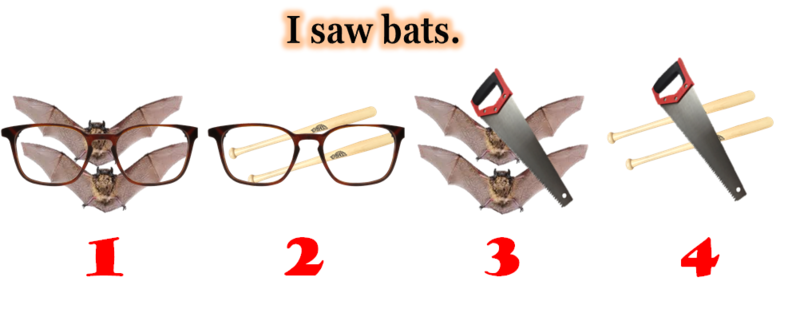

In [ ]:
from nltk.wsd import lesk 

s = 'I saw bats'

print(word_tokenize(s))
print(lesk(word_tokenize(s), 'saw')) # saw는 동사로 인삭
print(lesk(word_tokenize(s), 'bats')) # bats는 스쿼시 라켓 (명사)로 인식